# Word2Vec (Skipgram )

In [53]:
student_id = "st123497"
student_name = "Sandhya Lamichhane"

In [54]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [55]:
np.__version__, torch.__version__

('1.23.4', '1.13.0+cpu')

In [56]:
import matplotlib
matplotlib.__version__

'3.3.4'

## 1. Load data

#### 1.1. Specify the sentences/corpus
Source: https://en.wikipedia.org/wiki/American_Revolutionary_War

In [57]:
# f = open("corpus_text.txt", "r")
# text = f.read()
# f.close()

In [58]:
# corpus = text.split(".")[:-1]
# corpus[0:5]

In [59]:
import nltk
from nltk.corpus import brown
nltk.download('brown')


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Sagar\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

#### 1.2. Tokenize

In [60]:
corpus_tokenized = brown.sents()[:800]

#### 1.3 Numericalize
#### 1.3.1 Get all the unique words

In [61]:
flatten = lambda l: [item for sublist in l for item in sublist]
vocabs  = list(set(flatten(corpus_tokenized))) 

#### 1.3.2 Add `<UNK>`

In [62]:
word2index = dict()
word2index['<UNK>'] = 0 


In [63]:
word2index['<UNK>']

0

#### 1.3.3 Assign id to all these vocabulary

In [64]:
for index, vocab in enumerate(vocabs):
    word2index[vocab] = index+1
vocabs.append('<UNK>')

In [65]:
word2index

{'<UNK>': 0,
 'everything': 1,
 'surveyed': 2,
 'Essex': 3,
 'planned': 4,
 'tragedies': 5,
 'It': 6,
 'E.': 7,
 'included': 8,
 'Publishing': 9,
 'R': 10,
 'influences': 11,
 'parents': 12,
 'Field': 13,
 'superintendent': 14,
 'veiled': 15,
 'freeze': 16,
 'certain': 17,
 'national': 18,
 'election': 19,
 'swipe': 20,
 'destroy': 21,
 'inconclusive': 22,
 'Gulf': 23,
 'defense': 24,
 'up': 25,
 'D': 26,
 'dollars': 27,
 'contract-negotiation': 28,
 'beaming': 29,
 'observer': 30,
 'relatives': 31,
 'advisement': 32,
 'insist': 33,
 '5000': 34,
 'thing': 35,
 'concentrate': 36,
 'Gen.': 37,
 'blunders': 38,
 'Mitchell': 39,
 'Strickland': 40,
 'appearing': 41,
 'Constitution': 42,
 'Five': 43,
 'High': 44,
 'upon': 45,
 'program': 46,
 'places': 47,
 'level': 48,
 'town': 49,
 'Hoover': 50,
 'permit': 51,
 'Portugal': 52,
 'Opponents': 53,
 'wherever': 54,
 'topics': 55,
 'Eisenhower': 56,
 'points': 57,
 'schools': 58,
 'different': 59,
 'However': 60,
 'infiltrating': 61,
 'raising'

In [66]:
#create index2word dictionary
index2word = {v:k for k, v in word2index.items()}

index2word

{0: '<UNK>',
 1: 'everything',
 2: 'surveyed',
 3: 'Essex',
 4: 'planned',
 5: 'tragedies',
 6: 'It',
 7: 'E.',
 8: 'included',
 9: 'Publishing',
 10: 'R',
 11: 'influences',
 12: 'parents',
 13: 'Field',
 14: 'superintendent',
 15: 'veiled',
 16: 'freeze',
 17: 'certain',
 18: 'national',
 19: 'election',
 20: 'swipe',
 21: 'destroy',
 22: 'inconclusive',
 23: 'Gulf',
 24: 'defense',
 25: 'up',
 26: 'D',
 27: 'dollars',
 28: 'contract-negotiation',
 29: 'beaming',
 30: 'observer',
 31: 'relatives',
 32: 'advisement',
 33: 'insist',
 34: '5000',
 35: 'thing',
 36: 'concentrate',
 37: 'Gen.',
 38: 'blunders',
 39: 'Mitchell',
 40: 'Strickland',
 41: 'appearing',
 42: 'Constitution',
 43: 'Five',
 44: 'High',
 45: 'upon',
 46: 'program',
 47: 'places',
 48: 'level',
 49: 'town',
 50: 'Hoover',
 51: 'permit',
 52: 'Portugal',
 53: 'Opponents',
 54: 'wherever',
 55: 'topics',
 56: 'Eisenhower',
 57: 'points',
 58: 'schools',
 59: 'different',
 60: 'However',
 61: 'infiltrating',
 62: 'rais

## 2. Prepare train data

In [67]:
def random_batch(batch_size,corpus, window_size=1):
    skipgrams = []
    for sentence in corpus:
        sentence_length = len(sentence)
        for i in range(1, sentence_length-1): 
             center_word = word2index[sentence[i]]
             outside_word = []
             for ws in range(window_size):
                    ### check if it is outside of range of the list
                    if i + 1 + ws < sentence_length:
                        outside_word.append(word2index[sentence[i+ws+1]])
                    if i - ws - 1 >= 0:
                        outside_word.append(word2index[sentence[(i - ws - 1)]])
             for o in outside_word:
                 skipgrams.append([center_word, o])
    # print(len(skipgrams))
    # print(skipgrams[0:10])                
    random_index = np.random.choice(range(len(skipgrams)), batch_size, replace=False)
             
    random_inputs, random_labels = [], []   
    for index in random_index:
        random_inputs.append([skipgrams[index][0]]) 
        random_labels.append([skipgrams[index][1]])
        
    return np.array(random_inputs), np.array(random_labels)
    

In [68]:
input, label = random_batch(10, corpus_tokenized,2)
print(f"{input.shape}")
print(f"{input=}")
print(f"{label=}")

(10, 1)
input=array([[ 515],
       [1789],
       [ 480],
       [3031],
       [ 547],
       [1508],
       [3591],
       [2509],
       [1485],
       [2970]])
label=array([[3257],
       [3468],
       [ 547],
       [ 474],
       [ 127],
       [2559],
       [ 515],
       [2135],
       [ 547],
       [3648]])


## 3. Model

$$J(\theta) = -\frac{1}{T}\sum_{t=1}^{T}\sum_{\substack{-m \leq j \leq m \\ j \neq 0}}\log P(w_{t+j} | w_t; \theta)$$

where $P(w_{t+j} | w_t; \theta) = $

$$P(o|c)=\frac{\exp(\mathbf{u_o^{\top}v_c})}{\sum_{w=1}^V\exp(\mathbf{u_w^{\top}v_c})}$$

where $o$ is the outside words and $c$ is the center word

$$P(o|c)=\frac{\exp(\mathbf{u_o^{\top}v_c})}{\sum_{w=1}^V\exp(\mathbf{u_w^{\top}v_c})}$$

### 3.1 Creating the skipgram class

In [69]:
class Skipgram(nn.Module):
    '''
        Skipgram implementation 
        class that accepts the parameter vocabulary
        size and embedding size
    '''
    def __init__(self, voc_size, emb_size):
        super(Skipgram, self).__init__()
        self.embedding_center_word  = nn.Embedding(voc_size, emb_size)  
        self.embedding_outside_word = nn.Embedding(voc_size, emb_size)
    
    def forward(self, center_word, outside_word, all_vocabs):
        center_word_embed  = self.embedding_center_word(center_word)     
        outside_word_embed = self.embedding_outside_word(outside_word)  
        all_vocabs_embed   = self.embedding_outside_word(all_vocabs)    
        
        top_term = outside_word_embed.bmm(center_word_embed.transpose(1, 2)).squeeze(2)
        
        top_term_exp = torch.exp(top_term) 
        
        lower_term = all_vocabs_embed.bmm(center_word_embed.transpose(1, 2)).squeeze(2)         
        lower_term_sum = torch.sum(torch.exp(lower_term), 1)
        
        loss_fn = -torch.mean(torch.log(top_term_exp / lower_term_sum))
        
        return loss_fn

### 3.2 Preparing all_vocabs


In [70]:

batch_size = 2

def prepare_sequence(seq, word2index):
    idxs = list(map(lambda w: word2index[w] if word2index.get(w) is not None else word2index["<UNK>"], seq))
    return torch.LongTensor(idxs)

all_vocabs = prepare_sequence(list(vocabs), word2index).expand(batch_size, len(vocabs))
all_vocabs.shape

torch.Size([2, 3996])

## 4. Training

In [71]:
batch_size = 2 
emb_size   = 2 
model      = Skipgram(len(vocabs), emb_size)

optimizer  = optim.Adam(model.parameters(), lr=0.001)

####  Window size = 2

In [72]:
import time

num_epochs = 10000
start = time.time()

for epoch in range(num_epochs):
    input_batch, label_batch = random_batch(batch_size, corpus_tokenized,2)
    input_batch = torch.LongTensor(input_batch)
    label_batch = torch.LongTensor(label_batch)
    
    loss = model(input_batch, label_batch, all_vocabs)
    
    #backpropagate
    loss.backward()
    
    #update alpha
    optimizer.step()
    
    #print epoch loss
    if (epoch + 1) % 1000 == 0:
        end = time.time()
        print(f"Epoch {epoch+1} | Loss: {loss:.6f} | Time {end - start} ")

Epoch 1000 | Loss: 8.761700 | Time 143.12085366249084 
Epoch 2000 | Loss: 6.923769 | Time 292.08669114112854 
Epoch 3000 | Loss: 8.564865 | Time 446.30567240715027 
Epoch 4000 | Loss: 5.877479 | Time 601.13711977005 
Epoch 5000 | Loss: 7.564839 | Time 758.2972090244293 
Epoch 6000 | Loss: 10.905457 | Time 910.303076505661 
Epoch 7000 | Loss: 25.283829 | Time 1068.992296218872 
Epoch 8000 | Loss: 7.681908 | Time 1230.2090468406677 
Epoch 9000 | Loss: 10.797186 | Time 1391.5501446723938 
Epoch 10000 | Loss: nan | Time 1555.0779013633728 


## 5. Plot the embeddings

Check to see if related words are closer to each other or not

In [73]:
def get_embed(word):
    index = word2index.get(word,0)
    word = torch.LongTensor([index])

    center_embed  = model.embedding_center_word(word)
    outside_embed = model.embedding_outside_word(word)
    
    embed = (center_embed + outside_embed) / 2
    
    return  embed[0][0].item(), embed[0][1].item()


In [74]:
#Save Model

path = 'SkipgramsModel.pth'
torch.save(model.state_dict(), path)


In [75]:
print(get_embed('widely'))
print(get_embed('fruits'))


(nan, nan)
(nan, nan)


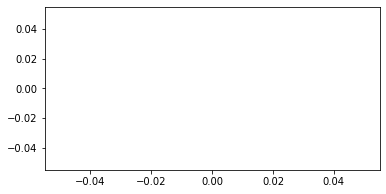

In [76]:
plt.figure(figsize=(6,3))
for i, word in enumerate(vocabs[:30]): #loop each unique vocab
    x, y = get_embed(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.show()

## 6. Cosine similarity


In [77]:
allied = get_embed('allied')
troops = get_embed('troops')
engaged = get_embed('engaged')

In [78]:
from scipy import spatial

def cosine_similarity(word1, word2):
    '''
        cosine_similarity function accepts the embeddings of two words and returns the 
        the degree of similarity between them using scipy.
    '''
    cos_sim = 1 - spatial.distance.cosine(word1, word2)  #distance = 1 - similarlity, because scipy only gives distance
    return cos_sim

In [79]:
skipgram_allied_troops = cosine_similarity(allied, troops)
skipgram_allied_engaged = cosine_similarity(allied, engaged)
skipgram_allied_allied = cosine_similarity(allied, allied)

print(f"allied vs troops {skipgram_allied_troops}")
print(f"allied vs engaged {skipgram_allied_engaged}")
print(f"allied vs allied {skipgram_allied_allied}" )

allied vs troops nan
allied vs engaged nan
allied vs allied nan


# Counting Bag of Words

In [80]:
def cbow_random_batch(batch_size,corpus, window_size=1):
    continuous_bag = []
    for sentence in corpus:
        sentence_length = len(sentence)
        for i in range(1, sentence_length-1): 
             target = word2index[sentence[i]]
             outside_word = []
             for ws in range(window_size):
                    ### check if it is outside of range of the list
                    if i + 1 + ws < sentence_length:
                        outside_word.append(word2index[sentence[i+ws+1]])
                    if i - ws - 1 >= 0:
                        outside_word.append(word2index[sentence[(i - ws - 1)]])
             for o in outside_word:
                 continuous_bag.append([o, target])
    # print(len(skipgrams))
    # print(skipgrams[0:10])                
    random_index = np.random.choice(range(len(continuous_bag)), batch_size, replace=False)
             
    random_inputs, random_labels = [], []   
    for index in random_index:
        random_inputs.append([continuous_bag[index][0]]) 
        random_labels.append([continuous_bag[index][1]])
        
    return np.array(random_inputs), np.array(random_labels)
    

In [81]:
batch_size = 2
input_batch, target_batch = cbow_random_batch(batch_size,corpus_tokenized,2)
print(f"{input.shape}")
print(f"{input=}")
print(f"{label=}")

(10, 1)
input=array([[ 515],
       [1789],
       [ 480],
       [3031],
       [ 547],
       [1508],
       [3591],
       [2509],
       [1485],
       [2970]])
label=array([[3257],
       [3468],
       [ 547],
       [ 474],
       [ 127],
       [2559],
       [ 515],
       [2135],
       [ 547],
       [3648]])


In [82]:
class CBOW(nn.Module):
    ''' Continuous Bag of words implementation 
        class that accepts the parameter vocabulary
        size and embedding size'''
    def __init__(self, voc_size, emb_size):
        super(CBOW, self).__init__()
        self.embedding_center_word  = nn.Embedding(voc_size, emb_size)  
        self.embedding_outside_word = nn.Embedding(voc_size, emb_size)
    
    def forward(self, center_word, outside_word, all_vocabs):
        center_word_embed  = self.embedding_center_word(center_word)     
        outside_word_embed = self.embedding_outside_word(outside_word)  
        all_vocabs_embed   = self.embedding_outside_word(all_vocabs)    
        
        top_term = outside_word_embed.bmm(center_word_embed.transpose(1, 2)).squeeze(2)
        
        top_term_exp = torch.exp(top_term) 
        
        lower_term = all_vocabs_embed.bmm(center_word_embed.transpose(1, 2)).squeeze(2)         
        lower_term_sum = torch.sum(torch.exp(lower_term), 1)
        
        loss_fn = -torch.mean(torch.log(top_term_exp / lower_term_sum))
        
        return loss_fn

In [83]:
embedding_size = 2
model = CBOW(len(vocabs), embedding_size)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [84]:
import time

num_epochs = 10000
start = time.time()

for epoch in range(num_epochs):
    input_batch, label_batch = random_batch(batch_size, corpus_tokenized,2)
    input_batch = torch.LongTensor(input_batch)
    label_batch = torch.LongTensor(label_batch)
    
    loss = model(input_batch, label_batch, all_vocabs)
    
    #backpropagate
    loss.backward()
    
    #update alpha
    optimizer.step()
    
    #print epoch loss
    if (epoch + 1) % 1000 == 0:
        end = time.time()
        print(f"Epoch {epoch+1} | Loss: {loss:.6f} | Time {end - start} ")

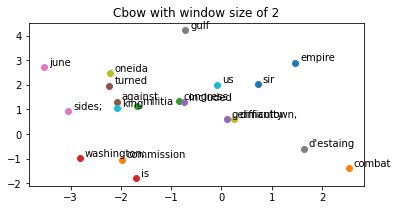

In [ ]:
plt.figure(figsize=(6,3))
for i, word in enumerate(vocabs[:20]): #loop each unique vocab
    x, y = get_embed(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.title('Cbow with window size of 2')
plt.show()


In [ ]:
#Save Model
path = 'CBOWModel.pth'
torch.save(model.state_dict(), path)

In [ ]:
allied = get_embed('allied')
troops = get_embed('troops')
engaged = get_embed('engaged')

print(f"allied vs troops {cosine_similarity(allied, troops)}")
print(f"allied vs engaged {cosine_similarity(allied, engaged)}")
print(f"allied vs allied {cosine_similarity(allied, allied)}" )

allied vs troops 0.9945074185163102
allied vs engaged -0.22923875614336797
allied vs allied 1.0


# Word2Vec vs Negative Sampling

### Unigram distribution

$$P(w)=U(w)^{3/4}/Z$$

In [ ]:
Z = 0.001

In [ ]:
from collections import Counter

word_count = Counter(flatten(corpus_tokenized))
num_total_words = sum([c for w, c in word_count.items()])

In [ ]:
word_count[',']

0

In [ ]:
num_total_words

2585

In [ ]:
unigram_table = []

for vo in vocabs:
    unigram_table.extend([vo] * int(((word_count[vo]/num_total_words)**0.75)/Z))

In [ ]:
Counter(unigram_table)

Counter({'empire': 2,
         'commission': 2,
         'congress': 15,
         'is': 2,
         'included': 4,
         'against': 9,
         'june': 4,
         'gulf': 4,
         'difficulty': 2,
         'us': 4,
         'sir': 2,
         'combat': 2,
         'militia': 9,
         'washington;': 2,
         'germantown,': 4,
         'turned': 2,
         'sides;': 2,
         "d'estaing": 2,
         'oneida': 2,
         'king': 4,
         'up': 6,
         'moved': 6,
         'enemy': 2,
         'withdrew': 2,
         'west': 7,
         'knox;': 2,
         'appeal': 2,
         'and,': 2,
         'baron': 2,
         '1778': 2,
         'ellis': 2,
         'seven': 2,
         'problems,': 2,
         'blocked': 2,
         'coercion': 2,
         'men': 4,
         'court': 2,
         'deficiencies': 2,
         'officers;': 2,
         '1783': 2,
         'progress': 2,
         'him': 2,
         'evacuated': 2,
         '"model': 2,
         'benjamin': 2,


### Negative Sampling

In [ ]:
import random

def negative_sampling(targets, unigram_table, k):
    batch_size = targets.size(0)
    neg_samples = []
    for i in range(batch_size):
        nsample = []
        target_index = targets[i].item()
        while len(nsample) < k: # num of sampling
            neg = random.choice(unigram_table)
            if word2index[neg] == target_index:
                continue
            nsample.append(neg)
        neg_samples.append(prepare_sequence(nsample, word2index).view(1, -1))
    
    return torch.cat(neg_samples)

### Testing the negative sampling

In [ ]:
input_batch  = torch.Tensor(input_batch)
target_batch = torch.LongTensor(target_batch)

In [ ]:
target_batch.shape

torch.Size([2, 1])

In [ ]:
num_neg = 3
negative_sampling(target_batch, unigram_table, num_neg)

tensor([[278, 338, 972],
        [118, 297, 735]])

In [ ]:
target_batch[1]

tensor([639])

### Model

$$\mathbf{J}_{\text{neg-sample}}(\mathbf{v}_c,o,\mathbf{U})=-\log(\sigma(\mathbf{u}_o^T\mathbf{v}_c))-\sum_{k=1}^K\log(\sigma(-\mathbf{u}_k^T\mathbf{v}_c))$$

In [ ]:
class SkipgramNegSampling(nn.Module):
    
    def __init__(self, vocab_size, emb_size):
        super(SkipgramNegSampling, self).__init__()
        self.embedding_v = nn.Embedding(vocab_size, emb_size) # center embedding
        self.embedding_u = nn.Embedding(vocab_size, emb_size) # out embedding
        self.logsigmoid = nn.LogSigmoid()
                    
    def forward(self, center_words, target_words, negative_words):
        center_embeds = self.embedding_v(center_words) # [batch_size, 1, emb_size]
        target_embeds = self.embedding_u(target_words) # [batch_size, 1, emb_size]
        neg_embeds    = -self.embedding_u(negative_words) # [batch_size, num_neg, emb_size]
        
        positive_score = target_embeds.bmm(center_embeds.transpose(1, 2)).squeeze(2)
        #[batch_size, 1, emb_size] @ [batch_size, emb_size, 1] = [batch_size, 1, 1] = [batch_size, 1]
        
        negative_score = neg_embeds.bmm(center_embeds.transpose(1, 2))
        #[batch_size, k, emb_size] @ [batch_size, emb_size, 1] = [batch_size, k, 1]
        
        loss = self.logsigmoid(positive_score) + torch.sum(self.logsigmoid(negative_score), 1)
                
        return -torch.mean(loss)
    
    def prediction(self, inputs):
        embeds = self.embedding_v(inputs)
        
        return embeds

### Training Negetive Sampling

In [ ]:
batch_size     = 2 
embedding_size = 2 
model          = SkipgramNegSampling(len(vocabs),embedding_size)
num_neg        = 10 

optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
import time

num_epochs = 10000
for epoch in range(num_epochs):
    
    start = time.time()
    
    input_batch, target_batch = random_batch(batch_size, corpus_tokenized,2)
    
    #input_batch: [batch_size, 1]
    input_batch = torch.LongTensor(input_batch)
    
    #target_batch: [batch_size, 1]
    target_batch = torch.LongTensor(target_batch)
    
    #negs_batch:   [batch_size, num_neg]
    negs_batch = negative_sampling(target_batch, unigram_table, num_neg)
    
    optimizer.zero_grad()
        
    loss = model(input_batch, target_batch, negs_batch)
    
    end = time.time()
        
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 1000 == 0:
        print(f"Epoch: {epoch + 1} | cost: {loss:.6f} | time: {end - start}")

Epoch: 1000 | cost: 8.653870 | time: 0.005999088287353516
Epoch: 2000 | cost: 8.008602 | time: 0.006000041961669922
Epoch: 3000 | cost: 9.718157 | time: 0.004999637603759766
Epoch: 4000 | cost: 9.275606 | time: 0.007999897003173828
Epoch: 5000 | cost: 9.484097 | time: 0.005999565124511719
Epoch: 6000 | cost: 10.175457 | time: 0.048996925354003906
Epoch: 7000 | cost: 9.623386 | time: 0.007000446319580078
Epoch: 8000 | cost: 9.440756 | time: 0.0070035457611083984
Epoch: 9000 | cost: 7.755592 | time: 0.003998994827270508
Epoch: 10000 | cost: 7.671986 | time: 0.005000114440917969


In [ ]:
#let's write a function to get embedding given a word
def get_embed_neg_sampling(word):
    id_tensor = torch.LongTensor([word2index[word]])
    v_embed = model.embedding_v(id_tensor)
    u_embed = model.embedding_u(id_tensor) 
    word_embed = (v_embed + u_embed) / 2 
    x, y = word_embed[0][0].item(), word_embed[0][1].item()

    return x, y


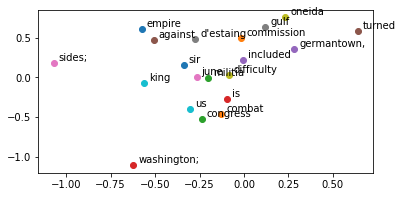

In [ ]:
plt.figure(figsize=(6,3))
for i, word in enumerate(vocabs[:20]): #loop each unique vocab
    x, y = get_embed_neg_sampling(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.show()

In [ ]:
neg_allied = get_embed_neg_sampling('allied')
neg_troops = get_embed_neg_sampling('troops')
neg_engaged = get_embed_neg_sampling('engaged')

neg_allied_troops = cosine_similarity(neg_allied, neg_troops)
neg_allied_engaged = cosine_similarity(neg_allied, neg_engaged)
neg_allied_allied = cosine_similarity(neg_allied, neg_allied)

print(f"allied vs troops {neg_allied_troops}")
print(f"allied vs engaged {neg_allied_engaged}")
print(f"allied vs allied {neg_allied_allied}" )

allied vs troops -0.9631360030609004
allied vs engaged -0.15783040229302925
allied vs allied 1.0


In [ ]:
#Save Model

path = 'NegSkipgramsModel.pth'
torch.save(model.state_dict(), path)


### Negative Sampling Skipgram vs Normal Skipgram

In [ ]:
print(f'Skipgram with Window size = 2')
print(f"allied vs. allied: ",        skipgram_allied_allied)
print(f"allied vs. engaged: ",       skipgram_allied_engaged)
print(f"allied vs. troops: ",     skipgram_allied_troops)

print(f'Skipgram with negative sampling Window size =  2')
print(f"allied vs. allied: ", neg_allied_allied)
print(f"allied vs. engaged: ", neg_allied_engaged)
print(f"allied vs. troops: ", neg_allied_troops)


Skipgram with Window size = 2
allied vs. allied:  1.0
allied vs. engaged:  -0.857918433484806
allied vs. troops:  0.19465362412227294
Skipgram with negative sampling Window size =  2
allied vs. allied:  1.0
allied vs. engaged:  -0.15783040229302925
allied vs. troops:  -0.9631360030609004
